# Plotting Example 

This is written as a Jupyter Notebook inside the  `docs` folder of the repository. 

The `Measurement` class loads the calorimetry data. You need to pass a folder name. Ideally a pathlib `Path` object containing the correct path is passed to `Measurement`. By default, the `Measurement` will load all data files contained in the folder that is passed. If you want to only load a specific file, you can pass a regex filter (as shown in the example below).

The `Measurement` object has several methods. Here we use the `plot` method to create the heat flow plot. If you create an axis object before, the method will draw the plot onto the axis object if it is passed (see the example below). The axis object can then be modified with the methods of Matplotlib.



Reading insitu_bm2.csv.
Are you missing some samples? Try rerunning with auto_clean=True and cold_start=True.


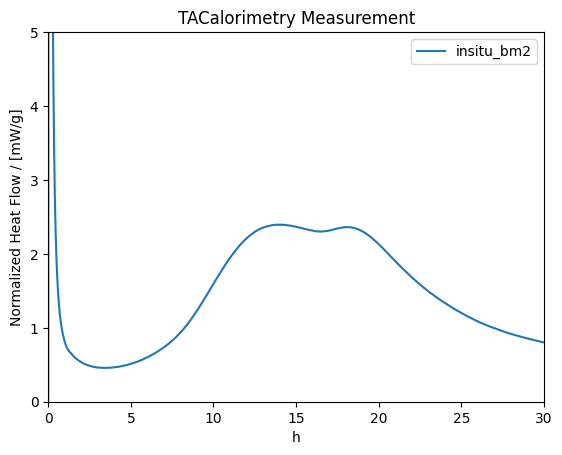

In [16]:
import matplotlib.pyplot as plt
from calocem.tacalorimetry import Measurement

from pathlib import Path

# here you need to define the suitable path to the data
# this reads a little cryptic because it is a relative path from the docs folder of the repo
datapath = Path().cwd().parent / "calocem" / "DATA"

tam = Measurement(datapath, regex=".*bm2.csv")

fig, ax = plt.subplots()
tam.plot(ax=ax)
ax.set_xlim(0, 30)
ax.set_ylim(0, 5)
ax.set_title("TACalorimetry Measurement")
plt.show()


## Folder Definition
If your folder looks like this, and your script is `myscript.py` 

```bash
.
├── myscript.py
└── calo_data
    ├── calofile1.csv
    └── calofile2.csv
```

then the pathlib definition in `myscript.py` would look like

```python
from pathlib import Path
datapath = Path(__file__).parent / "calo_data"
```

Here in the example above, however, the Jupyter Notebook is located in a special location, therefore the path looks a bit cryptic.

## Customizing the plot

Often we load more than one calorimetry experiment. In the following example, two files are loaded. Additionally, we want to plot the data such that we both see the very early heat development and the later heat development. We combine Matplotlib with CaloCem.

Reading insitu_bm2.csv.
Reading insitu_bm.csv.
Are you missing some samples? Try rerunning with auto_clean=True and cold_start=True.


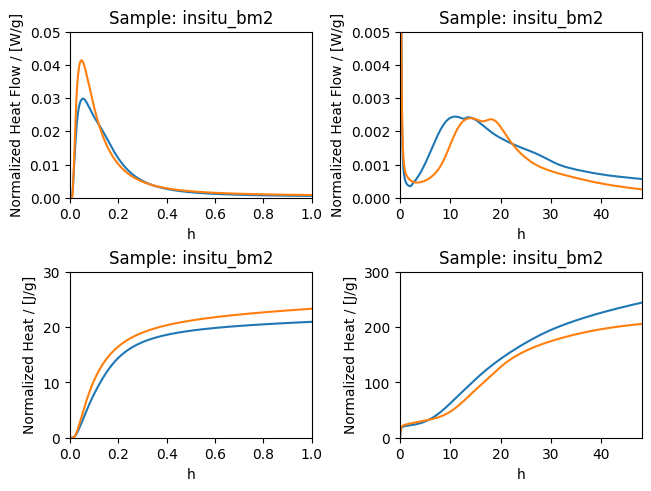

In [ ]:

tam = Measurement(datapath, regex=".*bm.*")

plot_configs = [
    {"ycol": "normalized_heat_flow_w_g", "xlim": 1, "ylim": 0.050},
    {"ycol": "normalized_heat_flow_w_g", "xlim": 48, "ylim": 0.005},
    {"ycol": "normalized_heat_j_g", "xlim": 1, "ylim": 30},
    {"ycol": "normalized_heat_j_g", "xlim": 48, "ylim": 300},
]

fig, axs = plt.subplots(2, 2, layout="constrained")
for ax, config in zip(axs.flatten(), plot_configs):
    tam.plot(y=config["ycol"], t_unit="h", y_unit_milli=False, ax=ax)
    ax.set_xlim(0, config["xlim"])
    ax.set_ylim(0, config["ylim"])
    ax.get_legend().remove()
plt.show()